In [12]:
from preprocessing.data_loader import load_and_process_data
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = load_and_process_data(remove_outliers=True, normalize=False, lab="1", verbose=False)
df['logrms'] = np.log1p(df['rms'])
df.insert(7, 'logrms', df.pop('logrms'))
df

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,logrms,mouseID,lab,sleepstage,epoch,unique_id
0,0.286260,0.175425,0.207455,0.125388,0.108024,0.058404,0.338769,0.291750,1.0,1.0,3.0,1.0,1
1,0.238637,0.121246,0.174037,0.067707,0.070327,0.040197,0.248721,0.222120,1.0,1.0,3.0,2.0,1
2,0.121714,0.290182,0.313687,0.087330,0.092042,0.071340,0.228859,0.206086,1.0,1.0,3.0,3.0,1
3,0.090216,0.104930,0.454057,0.256769,0.107563,0.061333,0.211976,0.192252,1.0,1.0,1.0,6.0,1
6,0.077062,0.133382,0.458816,0.114722,0.097439,0.039885,0.228008,0.205394,1.0,1.0,1.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619528,0.240800,0.143713,0.214692,0.110543,0.242276,0.084506,0.611090,0.476911,10.0,1.0,3.0,64081.0,10
619529,0.315116,0.245793,0.186567,0.042967,0.058941,0.035446,0.719127,0.541816,10.0,1.0,3.0,64082.0,10
619530,0.157484,0.224913,0.400872,0.019445,0.086112,0.077995,1.160650,0.770409,10.0,1.0,2.0,64083.0,10
619532,0.136393,0.385419,0.194001,0.092683,0.109606,0.036192,0.949600,0.667624,10.0,1.0,3.0,64086.0,10


In [13]:
# only keep ["slowdelta", "fastdelta", "slowtheta", "fasttheta", "alpha", "beta", "rms", "sleepstage"]
df = df.sort_values("sleepstage")
y2 = df['lab'].to_numpy()
X = df.drop(columns=['mouseID', 'lab', 'sleepstage', 'epoch', 'unique_id', 'rms'])
display(X)

y = df['sleepstage']
X = X.to_numpy()
y = y.to_numpy()
X = X.T

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,logrms
335537,0.122406,0.073231,0.467710,0.139499,0.063254,0.126635,0.274705
128226,0.073676,0.155480,0.610707,0.056183,0.054505,0.045831,0.184145
128225,0.194804,0.083172,0.442298,0.225302,0.060289,0.046696,0.185600
336211,0.135632,0.126053,0.474265,0.044993,0.093431,0.091400,0.390530
336210,0.198579,0.073991,0.407811,0.108167,0.102854,0.142745,0.250812
...,...,...,...,...,...,...,...
291181,0.394871,0.179005,0.198373,0.059902,0.058299,0.034504,0.187098
291180,0.213537,0.241227,0.364068,0.024364,0.114870,0.047976,0.181453
291179,0.197190,0.301443,0.261581,0.031998,0.079855,0.059688,0.170831
291190,0.080663,0.078107,0.306538,0.193537,0.205444,0.106719,0.246137


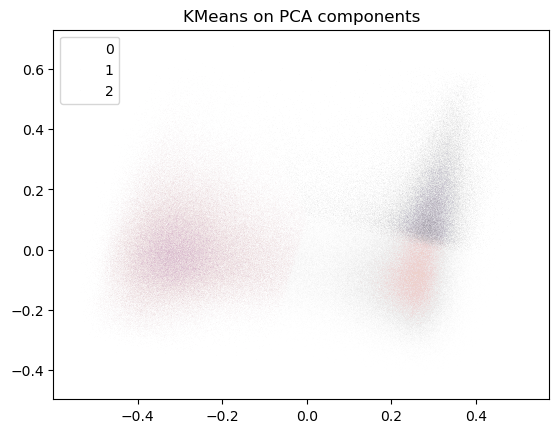

In [14]:
# Do KMeans on X
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X.T)
y_pred = kmeans.labels_

# plot KMeans results on the first two PCA components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.T)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_pred, s=0.01)
plt.title("KMeans on PCA components")
plt.show()

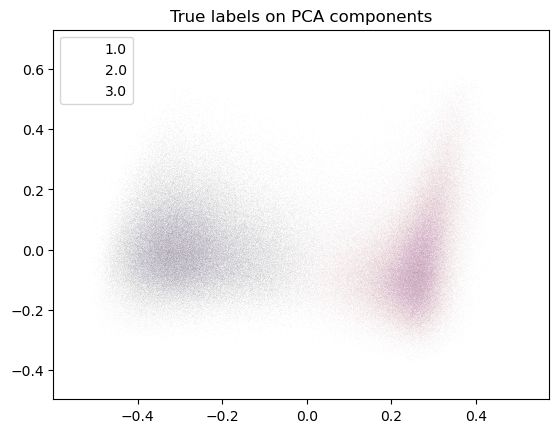

In [15]:
# plot the true labels on the first two PCA components
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, s=0.01)
plt.title("True labels on PCA components")
plt.show()

In [29]:
# accuracy of KMeans vs true labels, the y_pred might not be in the same order as y, try all permutations
from sklearn.metrics import accuracy_score
from itertools import permutations
perms = list(permutations([0,1,2]))
accs = []
for perm in perms:
    acc = accuracy_score(y-1, [perm[label] for label in y_pred])
    accs.append(acc)
    print(f"Accuracy: {np.round(acc,2)}, permutation: {perm}")
print(f"Best accuracy: {max(accs)}")

Accuracy: 0.01, permutation: (0, 1, 2)
Accuracy: 0.58, permutation: (0, 2, 1)
Accuracy: 0.4, permutation: (1, 0, 2)
Accuracy: 0.78, permutation: (1, 2, 0)
Accuracy: 0.21, permutation: (2, 0, 1)
Accuracy: 0.02, permutation: (2, 1, 0)
Best accuracy: 0.7751445495626847
